In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

## Drop useless columns

In [2]:
cols = 'CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	CAR2493_F	CAR2494_М	CAR2463	CAR2464	CAR2465	CAR2466	CAR2467	CAR2468	CAR2469	CAR2470	CAR2471	CAR2472	CAR2473	CAR2474	CAR2475	CAR2476	CAR2477	CAR2478	CAR2479	CAR2480	CAR2481	CAR2482	CAR2483	CAR2484	CAR2485	CAR2486	CAR2487	CAR2488	CAR2489	CAR2490	CAR2491	CAR2492'.split()
df = pd.read_csv('./data/interim/CARP_KANT.vcf', sep='\t', 
    comment='#', header=None, names=cols) # 8min
df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CAR2493_F,...,CAR2483,CAR2484,CAR2485,CAR2486,CAR2487,CAR2488,CAR2489,CAR2490,CAR2491,CAR2492
0,NC_056572.1,186,.,C,T,347.924,.,DP=18;VDB=2.41924e-09;SGB=-1.31291;RPBZ=-0.848...,GT:PL:DP,"1/1:9,3,0:1",...,"./.:0,0,0:0","1/1:45,6,0:2","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","./.:0,0,0:0","1/1:33,3,0:1","1/1:34,3,0:1"
1,NC_056572.1,264,.,atttttttt,attttttt,742.671,.,INDEL;IDV=12;IMF=1;DP=164;VDB=4.00419e-13;SGB=...,GT:PL:DP,"0/1:21,0,57:3",...,"1/1:55,6,0:2","0/1:24,0,27:2","0/1:24,0,30:2","0/0:0,6,66:2","1/1:47,6,0:2","0/1:30,3,0:1","0/1:21,0,57:3","0/1:56,0,104:7","0/0:0,12,108:4","0/0:0,21,146:7"
2,NC_056572.1,310,.,A,G,785.540,.,DP=235;VDB=0.108634;SGB=-1.65358;RPBZ=-0.77472...,GT:PL:DP,"0/1:52,0,111:5",...,"0/0:0,6,64:2","0/0:0,9,91:3","0/0:0,9,86:3","0/0:0,12,168:4","0/1:86,0,65:4","0/1:27,0,30:2","0/1:27,0,79:4","0/0:0,24,195:8","0/0:0,18,167:6","0/0:0,27,172:9"
3,NC_056572.1,410,.,G,C,1072.760,.,DP=258;VDB=0.440706;SGB=-13.0246;RPBZ=-0.60076...,GT:PL:DP,"0/0:0,18,144:6",...,"0/1:64,0,57:4","0/1:24,0,80:3","0/1:53,0,30:5","0/0:0,24,223:8","0/1:166,0,18:6","0/1:36,3,0:1","0/0:0,15,170:5","0/1:78,0,107:7","0/1:18,0,131:6","0/0:0,15,132:5"
4,NC_056572.1,419,.,C,T,1267.530,.,DP=245;VDB=0.134293;SGB=-9.73095;RPBZ=0.732702...,GT:PL:DP,"0/1:80,0,49:5",...,"0/0:0,9,118:3","0/1:80,0,28:3","0/1:31,0,17:4","0/1:112,0,118:9","0/0:0,15,192:5","0/0:0,6,64:2","0/0:0,15,169:5","0/1:99,0,77:7","0/1:129,0,20:6","0/1:52,0,76:6"


In [8]:
df['ID'].value_counts()

.    28822046
Name: ID, dtype: int64

In [9]:
df['FILTER'].value_counts()

.    28822046
Name: FILTER, dtype: int64

In [3]:
car_cols = [x for x in df.columns if 'CAR' in x]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28822046 entries, 0 to 28822045
Data columns (total 41 columns):
 #   Column     Dtype  
---  ------     -----  
 0   CHROM      object 
 1   POS        int64  
 2   ID         object 
 3   REF        object 
 4   ALT        object 
 5   QUAL       float64
 6   FILTER     object 
 7   INFO       object 
 8   FORMAT     object 
 9   CAR2493_F  object 
 10  CAR2494_М  object 
 11  CAR2463    object 
 12  CAR2464    object 
 13  CAR2465    object 
 14  CAR2466    object 
 15  CAR2467    object 
 16  CAR2468    object 
 17  CAR2469    object 
 18  CAR2470    object 
 19  CAR2471    object 
 20  CAR2472    object 
 21  CAR2473    object 
 22  CAR2474    object 
 23  CAR2475    object 
 24  CAR2476    object 
 25  CAR2477    object 
 26  CAR2478    object 
 27  CAR2479    object 
 28  CAR2480    object 
 29  CAR2481    object 
 30  CAR2482    object 
 31  CAR2483    object 
 32  CAR2484    object 
 33  CAR2485    object 
 34  CAR2486    objec

In [8]:
# test_df = pd.read_csv('./data/interim/header2.vcf', sep='\t', comment='#')

In [ ]:
df['is_indel'] = df['INFO'].str.contains('INDEL')

In [5]:
for c in car_cols:
    df[c+'_GT'] = df[c].str.slice(0, 3)

In [6]:
df['CAR2477_GT'].value_counts()

0/0    10296622
0/1     9582222
1/1     6039931
./.     2643140
1/2      171278
0/2       39824
1/3       22933
2/2       17800
2/3        7369
3/3         927
Name: CAR2477_GT, dtype: int64

In [7]:
df[df['CAR2477_GT'] == '1/2']

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CAR2493_F,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
281,NC_056572.1,30401,.,caaaaa,"cAAaaaaa,cAAAaaaaa",7439.940,.,INDEL;IDV=36;IMF=0.9;DP=963;VDB=0.00572762;SGB...,GT:PL:DP,"1/1:218,21,0,218,21,218:7",...,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/1,1/2,1/1
767,NC_056572.1,56024,.,taaaaaaaaaaaa,"tAaaaaaaaaaaaa,tAAaaaaaaaaaaaa",4544.460,.,INDEL;IDV=23;IMF=0.766667;DP=664;VDB=5.73186e-...,GT:PL:DP,"1/2:150,54,42,103,0,100:5",...,1/2,1/1,1/2,1/1,1/1,1/1,1/1,1/1,1/2,1/1
864,NC_056572.1,62405,.,cttttttttttttttttttttttt,"ctttttttttttttttt,cTTttttttttttttttttttttttt",3369.350,.,INDEL;IDV=25;IMF=0.833333;DP=747;VDB=1.07828e-...,GT:PL:DP,"1/1:255,27,0,255,27,255:9",...,1/1,./.,./.,1/2,1/1,1/1,1/2,1/2,./.,./.
1017,NC_056572.1,68820,.,aggtg,"ag,agtg",5498.470,.,INDEL;IDV=18;IMF=0.692308;DP=479;VDB=0.0011212...,GT:PL:DP,"1/2:135,68,69,66,0,67:7",...,1/2,1/2,1/2,1/2,1/1,1/2,1/2,2/2,1/2,1/2
1767,NC_056572.1,112164,.,tggggggggg,"tGGGGggggggggg,tGGGggggggggg,tGggggggggg",2076.390,.,INDEL;IDV=13;IMF=1;DP=233;VDB=3.10823e-30;SGB=...,GT:PL:DP,"./.:0,0,0,0,0,0,0,0,0,0:0",...,1/1,1/1,1/1,1/2,./.,1/3,./.,2/3,1/2,1/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28821304,NC_056621.1,24389439,.,A,"C,T",4681.870,.,DP=1111;VDB=0.24544;SGB=-44.7611;RPBZ=-5.35576...,GT:PL:DP,"1/1:237,20,0,249,78,255:30",...,1/2,0/1,1/1,1/1,0/1,0/1,1/2,0/1,1/2,0/1
28821408,NC_056621.1,24397975,.,taaaaaaaaaaaaaaaaaa,"taaaaaaaaaaaaaaaa,taaaaaaaaaaaaaaa,taaaaaaaaaa...",7071.840,.,INDEL;IDV=33;IMF=0.825;DP=563;VDB=0.0850723;SG...,GT:PL:DP,"1/1:255,40,0,255,57,255,255,57,255,255:20",...,1/2,1/3,1/3,1/1,2/2,1/2,1/3,1/3,1/3,2/2
28821455,NC_056621.1,24405041,.,taaaaaaaaaaaaaaaaa,"tAAaaaaaaaaaaaaaaaaa,tAAAAaaaaaaaaaaaaaaaaa",5570.240,.,INDEL;IDV=26;IMF=0.787879;DP=646;VDB=0.0066792...,GT:PL:DP,"1/1:223,24,0,223,24,223:8",...,./.,1/1,./.,1/2,2/2,2/2,1/1,1/1,1/1,1/2
28821468,NC_056621.1,24408424,.,atttttttttttttttttttttt,"atttttttttttttttttttt,attttttttttttttttttt",3248.880,.,INDEL;IDV=22;IMF=0.758621;DP=490;VDB=0.0023395...,GT:PL:DP,"1/1:40,3,0,40,3,40:1",...,1/1,./.,./.,1/2,1/2,1/2,1/1,./.,1/1,1/2


In [11]:
cold_to_del = car_cols + ['FILTER', 'ID', 'INFO', 'FORMAT']
df_flt = df.drop(cold_to_del, axis=1)

In [15]:
df_flt.to_parquet('./data/interim/CARP_KANT.parquet')

## Main

In [3]:
df = pd.read_parquet('./data/CARP_KANT.parquet')
df

,CHROM,POS,REF,ALT,QUAL,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,CAR2465_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.9240,1/1,./.,./.,1/1,1/1,...,./.,1/1,./.,./.,./.,./.,./.,./.,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.6710,0/1,0/1,1/1,0/1,0/0,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.5400,0/1,0/0,1/1,0/1,0/0,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.7600,0/0,0/1,0/0,0/0,0/1,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.5300,0/1,0/0,0/0,0/0,0/1,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28822041,NC_056621.1,24466013,taaaa,tAaaaa,29.4556,0/0,./.,./.,./.,./.,...,./.,./.,./.,./.,./.,./.,0/0,./.,./.,./.
28822042,NC_056621.1,24466018,C,A,1710.7000,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,0/1,1/1,1/1,./.
28822043,NC_056621.1,24466071,A,G,701.4380,0/0,0/1,0/0,1/1,0/0,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,0/1,0/0
28822044,NC_056621.1,24466075,C,T,700.1770,0/0,0/1,0/0,1/1,0/0,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,1/1,0/0


In [4]:
car_cols = [x for x in df.columns if 'CAR' in x]
child_cols = car_cols[2:]
len(child_cols)

30

In [5]:
for c in tqdm.tqdm(car_cols):
    df[c].replace('./.', np.nan, inplace=True)

  0%|          | 0/32 [00:00<?, ?it/s]/tmp/ipykernel_56754/884299277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].replace('./.', np.nan, inplace=True)
100%|██████████| 32/32 [00:44<00:00,  1.40s/it]


In [6]:
df.head()

,CHROM,POS,REF,ALT,QUAL,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,CAR2465_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.924,1/1,NaN,NaN,1/1,1/1,...,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.671,0/1,0/1,1/1,0/1,0/0,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.540,0/1,0/0,1/1,0/1,0/0,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.760,0/0,0/1,0/0,0/0,0/1,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.530,0/1,0/0,0/0,0/0,0/1,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1


In [7]:
df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'CAR2493_F_GT', 'CAR2494_М_GT',
       'CAR2463_GT', 'CAR2464_GT', 'CAR2465_GT', 'CAR2466_GT', 'CAR2467_GT',
       'CAR2468_GT', 'CAR2469_GT', 'CAR2470_GT', 'CAR2471_GT', 'CAR2472_GT',
       'CAR2473_GT', 'CAR2474_GT', 'CAR2475_GT', 'CAR2476_GT', 'CAR2477_GT',
       'CAR2478_GT', 'CAR2479_GT', 'CAR2480_GT', 'CAR2481_GT', 'CAR2482_GT',
       'CAR2483_GT', 'CAR2484_GT', 'CAR2485_GT', 'CAR2486_GT', 'CAR2487_GT',
       'CAR2488_GT', 'CAR2489_GT', 'CAR2490_GT', 'CAR2491_GT', 'CAR2492_GT'],
      dtype='object')

In [8]:
df.shape

(28822046, 37)

In [9]:
df['CAR2493_F_GT'].isna().sum()

2516576

In [10]:
nvar = len(df)
nvar_F = nvar - df['CAR2493_F_GT'].isna().sum()
nvar_M = nvar - df['CAR2494_М_GT'].isna().sum()
nvar, nvar_F, nvar_M

(28822046, 26305470, 26289881)

In [12]:
df

,CHROM,POS,REF,ALT,QUAL,CAR2493_F_GT,CAR2494_М_GT,CAR2463_GT,CAR2464_GT,CAR2465_GT,...,CAR2483_GT,CAR2484_GT,CAR2485_GT,CAR2486_GT,CAR2487_GT,CAR2488_GT,CAR2489_GT,CAR2490_GT,CAR2491_GT,CAR2492_GT
0,NC_056572.1,186,C,T,347.9240,1/1,NaN,NaN,1/1,1/1,...,NaN,1/1,NaN,NaN,NaN,NaN,NaN,NaN,1/1,1/1
1,NC_056572.1,264,atttttttt,attttttt,742.6710,0/1,0/1,1/1,0/1,0/0,...,1/1,0/1,0/1,0/0,1/1,0/1,0/1,0/1,0/0,0/0
2,NC_056572.1,310,A,G,785.5400,0/1,0/0,1/1,0/1,0/0,...,0/0,0/0,0/0,0/0,0/1,0/1,0/1,0/0,0/0,0/0
3,NC_056572.1,410,G,C,1072.7600,0/0,0/1,0/0,0/0,0/1,...,0/1,0/1,0/1,0/0,0/1,0/1,0/0,0/1,0/1,0/0
4,NC_056572.1,419,C,T,1267.5300,0/1,0/0,0/0,0/0,0/1,...,0/0,0/1,0/1,0/1,0/0,0/0,0/0,0/1,0/1,0/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28822041,NC_056621.1,24466013,taaaa,tAaaaa,29.4556,0/0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0/0,NaN,NaN,NaN
28822042,NC_056621.1,24466018,C,A,1710.7000,1/1,1/1,1/1,1/1,1/1,...,1/1,1/1,1/1,1/1,1/1,1/1,0/1,1/1,1/1,NaN
28822043,NC_056621.1,24466071,A,G,701.4380,0/0,0/1,0/0,1/1,0/0,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,0/1,0/0
28822044,NC_056621.1,24466075,C,T,700.1770,0/0,0/1,0/0,1/1,0/0,...,0/0,0/1,0/1,0/0,0/0,0/0,0/1,1/1,1/1,0/0


In [11]:
(df['CAR2493_F_GT'] == df['CAR2494_М_GT']).sum()

12260455

In [13]:
(df['CAR2493_F_GT'] == df['CAR2464_GT']).sum()

16413790

In [14]:
(df['CAR2493_F_GT'] == df['CAR2483_GT']).sum()

16446845

In [15]:
data_isec = []
for ch in tqdm.tqdm(child_cols):
    ncommon_M = (df['CAR2494_М_GT'] == df[ch]).sum()
    ncommon_F = (df['CAR2493_F_GT'] == df[ch]).sum()
    private2M = nvar_M - ncommon_M
    private2F = nvar_F - ncommon_F
    
    nvar_ch = nvar - df[ch].isna().sum()

    private2chF = nvar_ch - ncommon_F
    private2chM = nvar_ch - ncommon_M

    data_isec.append((ch, ncommon_M, private2M, private2chM, ncommon_F, private2F, private2chF))
df_isec = pd.DataFrame(data_isec, columns=('ch', 'ncommon_M', 'private2M', 'private2chM', 'ncommon_F', 'private2F', 'private2chF'))

100%|██████████| 30/30 [01:52<00:00,  3.73s/it]


In [17]:
df_isec['iouM'] = df_isec['ncommon_M'] / (df_isec['ncommon_M'] + df_isec['private2M'] + df_isec['private2chM'])
df_isec['iouF'] = df_isec['ncommon_F'] / (df_isec['ncommon_F'] + df_isec['private2F'] + df_isec['private2chF'])


Groups:
- [63, 72] - control
- [73, 82] - NEM/SHOK
- [83, 92] - NEM

In [21]:
sample2gr = dict()
for i in range(63, 73):
    sample2gr[f'CAR24{i}_GT'] = 'Ctrl'
for i in range(73, 83):
    sample2gr[f'CAR24{i}_GT'] = 'NEM/SHOK'
for i in range(83, 93):
    sample2gr[f'CAR24{i}_GT'] = 'NEM'

In [23]:
df_isec['Group'] = df_isec['ch'].map(sample2gr)

In [24]:
df_isec

,ch,ncommon_M,private2M,private2chM,ncommon_F,private2F,private2chF,iouM,iouF,Group
0,CAR2463_GT,15861643,10428238,10274012,16279957,10025513,9855698,0.433806,0.450206,Ctrl
1,CAR2464_GT,16004171,10285710,10185242,16413790,9891680,9775623,0.438769,0.454914,Ctrl
2,CAR2465_GT,15878840,10411041,10269173,16174325,10131145,9973688,0.434334,0.445830,Ctrl
3,CAR2466_GT,15482932,10806949,10781137,16728693,9576777,9535376,0.417656,0.466749,Ctrl
4,CAR2467_GT,15762513,10527368,10450606,16470997,9834473,9742122,0.429023,0.456924,Ctrl
5,CAR2468_GT,15620105,10669776,10576420,16396207,9909263,9800318,0.423696,0.454116,Ctrl
6,CAR2469_GT,15638148,10651733,10457880,16403480,9901990,9692548,0.425554,0.455677,Ctrl
7,CAR2470_GT,15835269,10454612,10359242,16038315,10267155,10156196,0.432078,0.439868,Ctrl
8,CAR2471_GT,12657387,13632494,13420751,14502675,11802795,11575463,0.318741,0.382849,Ctrl
9,CAR2472_GT,15742553,10547328,10311003,16397320,9908150,9656236,0.430114,0.455966,Ctrl


<Axes: xlabel='Group', ylabel='private2chM'>

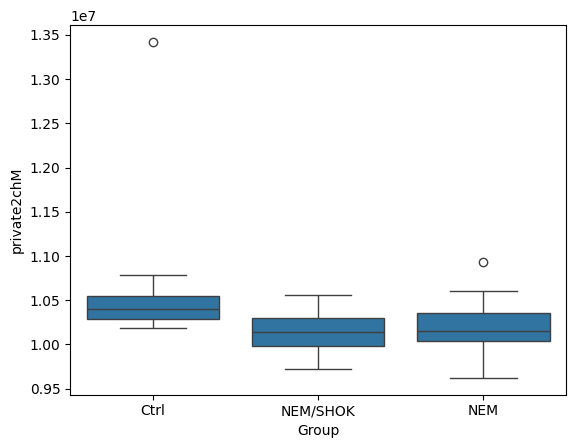

In [55]:
sns.boxplot(df_isec, y='private2chM', x='Group')

In [29]:
import pingouin as pg

pg.pairwise_tests(data=df_isec[df_isec.ch != 'CAR2471_GT'], 
                  dv='iouM', between='Group', parametric=False, padjust='bonf')

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Group,Ctrl,NEM,False,False,29.0,two-sided,0.205667,0.617002,bonf,-0.523503
1,Group,Ctrl,NEM/SHOK,False,False,24.0,two-sided,0.094166,0.282499,bonf,-0.829268
2,Group,NEM,NEM/SHOK,False,False,47.0,two-sided,0.850107,1.000000,bonf,-0.037968


In [46]:
pg.pairwise_tests(data=df_isec[df_isec.ch != 'CAR2471_GT'], 
                  dv='iouF', between='Group', parametric=False, padjust='bonf')

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,p-corr,p-adjust,hedges
0,Group,Ctrl,NEM,False,False,59.0,two-sided,0.270344,0.811032,bonf,0.446002
1,Group,Ctrl,NEM/SHOK,False,False,71.0,two-sided,0.037336,0.112009,bonf,0.857256
2,Group,NEM,NEM/SHOK,False,False,59.0,two-sided,0.520523,1.000000,bonf,0.307352


In [58]:
pg.kruskal(data=df_isec[df_isec.ch != 'CAR2471_GT'], dv='private2chM', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,2,5.690728,0.058113


In [44]:
pg.kruskal(data=df_isec[df_isec.ch != 'CAR2471_GT'], dv='iouM', between='Group')

,Source,ddof1,H,p-unc
Kruskal,Group,2,3.12567,0.209541


In [25]:
df_isec.to_csv('./data/df_isec.tsv', sep='\t', index=False)

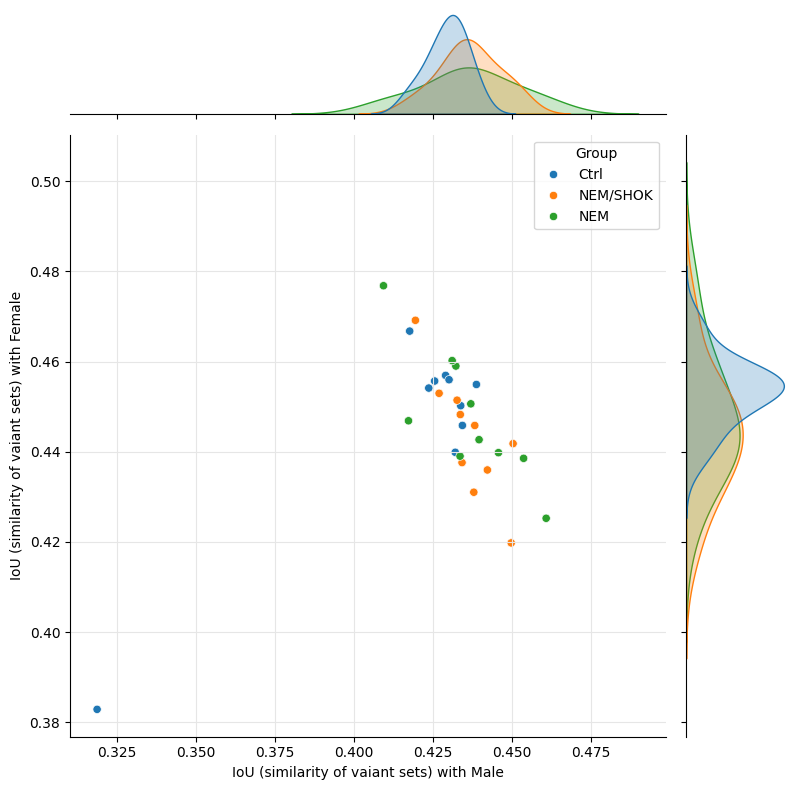

In [26]:
# plt.figure(figsize=(12, 8))
g = sns.jointplot(data=df_isec[df_isec.ch != 'CAR2471_GT'], x='iouM', y='iouF', hue='Group', kind="scatter", height=8, ratio=5)
sns.scatterplot(data=df_isec, x='iouM', y='iouF', hue='Group', legend=False)

plt.xlabel('IoU (similarity of vaiant sets) with Male')
plt.ylabel('IoU (similarity of vaiant sets) with Female')
plt.grid(color='0.9')
plt.savefig('./figures/IoU_children.pdf')
plt.show()